<a href="https://colab.research.google.com/github/josware/mcc_tareas/blob/master/Tarea5_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para una mejor experiencia visualisar en Google Colab en la siguiente liga: 

https://colab.research.google.com/drive/1CnecuO1fnKanACujMDZDqW2NknV0lApK?usp=sharing

# **ITESM Campus Guadalajara**

Técnicas Computacionales de Aprendizaje Automático (Ago-Dic 2020)


**Tarea4 RLM & SVM**


---



Integrantes:



*   Anna Karen Casillas Garcia - A00354860 
*   Josue Emmanuel Gomez - A00354512
*   Luis Francisco Gonzalez - A00540988




# RunMe First

In [ ]:
import numpy as np    # biblioteca para el manejo de vectores y matrices en python.
import pandas as pd   # biblioteca para el manejo de datos y tablas.
import zipfile as zip # biblioteca para el manejo de archivos comprimidos.
import matplotlib.pyplot as plt   # biblioteca para visualización de datos.
import statsmodels.api as sm      # biblioteca para pruebas estadísticas.
import seaborn as sns
from sklearn.model_selection import train_test_split #Indispensable inciso b
from sklearn.naive_bayes import *
#from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix # included as a whole as we will need accuracy and others
from sklearn.metrics import f1_score


In [ ]:
#Bajando data
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat

path_data = "/content/australian.dat"
arr_column_names = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','class']
data_original = pd.read_csv(path_data,sep="\s+", header=None)

#Para cumplir con los requerimientos del ejercicio se cargaran los nombres de columnas 
#Hasta un paso después, para hacerlo al momento de carga:
#  data_original = pd.read_csv(path_data,sep="\s+", names=arr_column_names)
#  data_original.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28735  100 28735    0     0  25794      0  0:00:01  0:00:01 --:--:-- 25794


# 1) Con base en la lectura del siguiente artículo, contesta las preguntas de los incisos:
https://www.cs.unb.ca/~hzhang/publications/FLAIRS04ZhangH.pdf

## a) ¿Cuál es la diferencia entre el método del Bayes Ingenuo (Naïve Bayes) y el Bayes ingenuo aumentado (Augmented Naïve Bayes)?

*   Naive Bayes es la forma más sencilla del algoritmo basado en el teorema de Bayes, se basa en suponer que las características contribuyen independientemente a la probabilidad, sin tomar referencia o dependencia entre ellas.
*   El método aumentado, mantiene la estructura original del Bayes Ingenuo, pero agrega una relación entre las características de una clase, proponiendo que si hay una cierta co-relación
*   A pesar de ser mas realista el método aumentado también incrementa el costo computacional, y tomando en cuenta el buen desempeño del método ingenuo hace más atractiva la primera opción (Naive Bayes) en muchos de los casos, ya que su desempeño es similar a algoritmos más modernos como el C4.5


## b) ¿Cómo justifica el autor del artículo que el método del Bayes ingenuo funcione tan bien como método de clasificación, aún cuando la condición de que los eventos sean condicionalmente independientes con respecto a las clases casi nunca se cumple en los problemas reales?



*   El autor concluye que Naive Bayes funciona bien y da los escenarios en los que sería optimo
*   Sin embargo hay que tener en cuenta que por ejemplo para problemas de regresión o predecir valores continuos el método de Bayes ingenuo podría no ser la mejor elección, esto es ya que su éxito está altamente ligado a la función de perdida, siendo la mejor la cero-uno, esto es por que si una probabilidad dada es digamos .9 - .1 (hablando solo de dos clases) es igualmente buena que .6 - .4; en otras palabras al asegurarnos que el caso de uso es solo predecir la clase correcta sin tomar en cuenta con que exactitud se predijo Naive Bayes tendrá un buen desempeño, al menos en la opinión de Domingos & Pazzani).
*   El autor propone una nueva explicación y habla de que ya sea las variables, al tener dependencias y estar distribuidas se cancelan unas a otras ó se complementant y por eso el algoritmo funciona tan bien, al mismo tiempo que menciona 4 teoremas. Sin embargo puede darse el caso en que no sea así.
*   Siendo la condición optima para usar Naive Bayes cuando las dependencias se cancelan entre ellas.
*   Nuestra conclusión es que lo importante es utilizar el algoritmo correcto según el problema y especialmente poner atención en los meta-parámetros como lo son la función de costo a usar.





# 2) En el siguiente artículo:
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.61.5542&rep=rep1&type=pdf

* Se habla de que existen varios modelos basados en el Bayes Ingenuo (NB) de acuerdo al tipo de datos que tenga el problema: continuos, categóricos, binarios, etc. 
* En particular en este ejercicio veremos un problema con dos tipos de datos: categóricos y continuos. 
* Las librerías en general contienen soluciones para un solo tipo de dato. 
* Cuando se tienen varios tipos de datos se pueden proponer diversas formas de enfrentar el problema. 
* En particular en este ejercicio lo resolverás primero modelando 
 * las variables categóricas por un lado (usando el modelo NB para variables categóricas) 
 * y las variables continuas por otro (usando el modelo gaussiano del NB).
* Finalmente propondrás la solución al problema biclase mediante el producto de ambas predicciones probabilísticas.
* Trabajarás con la base de datos de la UCI referente a solicitudes de tarjetas de crédito de clientes australianos. 
 * Deberás descargar el archivo **“australian.dat”** de la siguiente liga y contestar los incisos que se indican a continuación:

https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29


## Inicializar Dataset

In [ ]:
#Por conveniencia se corre al inicio del documento en la celda RunME First
data_original.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


## a) Agrega los nombres a las columnas como se indica en la página de la UCI y realiza un análisis descriptico de los datos. Escribe tus conclusiones.

### Agregando nombres de columnas

In [ ]:
data_original.columns = arr_column_names
data_original.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


### Análisis

In [ ]:
print("Shape: ",data_original.shape)

Shape:  (690, 15)


El dataset cuenta con 690 registros y 15 columnas, de las cuales 14 son atributos y una es la clasificación o clase de los registros:

 1. **A1:**	0,1    CATEGORICAL, a,b
 1. **A2:**	continuous.
 1. **A3:**	continuous.
 1. **A4:**	1,2,3         CATEGORICAL       p,g,gg
 1. **A5:**  1, 2,3,4,5, 6,7,8,9,10,11,12,13,14    CATEGORICAL ff,d,i,k,j,aa,m,c,w,  e, q, r,cc, x       
 1. **A6:**	 1, 2,3, 4,5,6,7,8,9    CATEGORICAL ff,dd,j,bb,v,n,o,h,z 
 1. **A7:**	continuous.
 1. **A8:**	1, 0       CATEGORICAL t, f.
 1. **A9:** 1, 0	    CATEGORICAL t, f.
 1. **A10:**	continuous.
 1. **A11:**  1, 0	    CATEGORICAL t, f.
 1. **A12:**    1, 2, 3    CATEGORICAL s, g, p 
 1. **A13:**	continuous.
 1. **A14**:	continuous.
 1. **Class**   1,2 +,-         (class attribute)



**Datos Originales etiquetados**

In [ ]:
data_original.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


**Análisis de las variables**

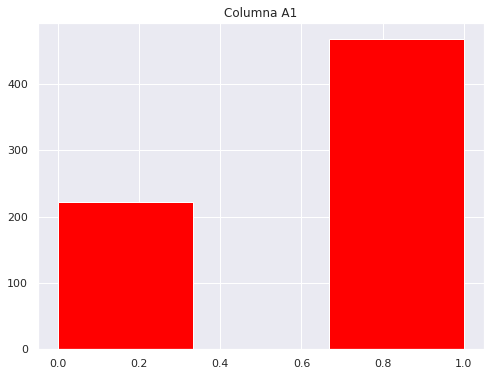

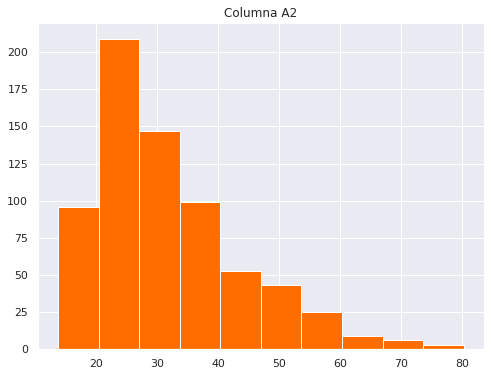

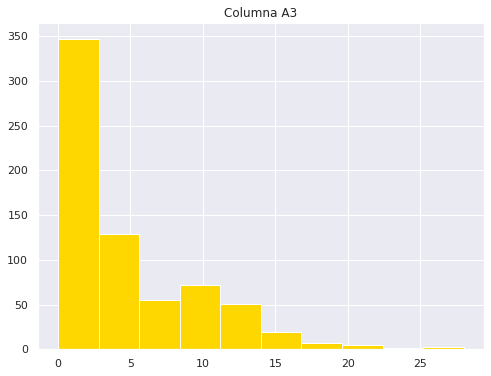

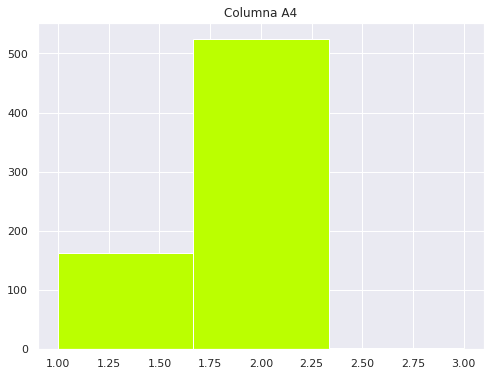

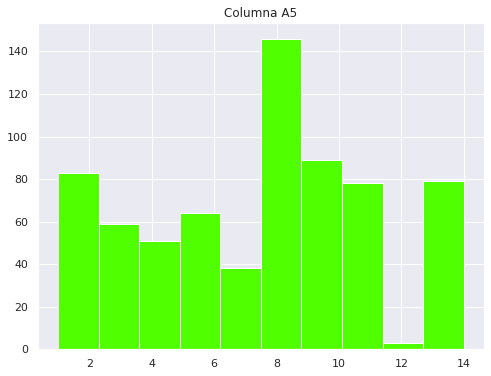

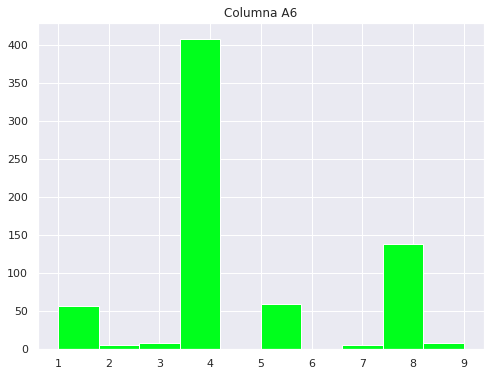

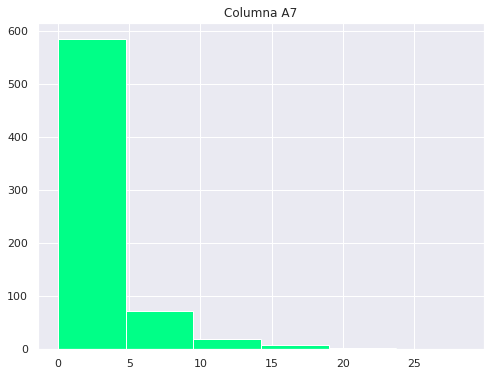

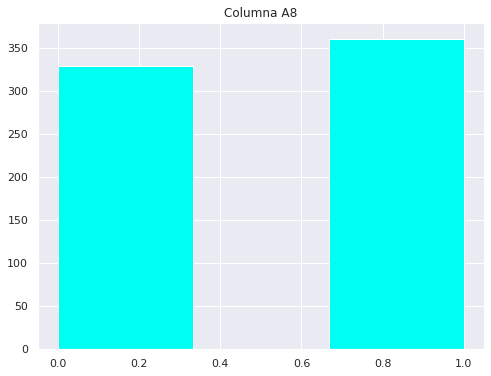

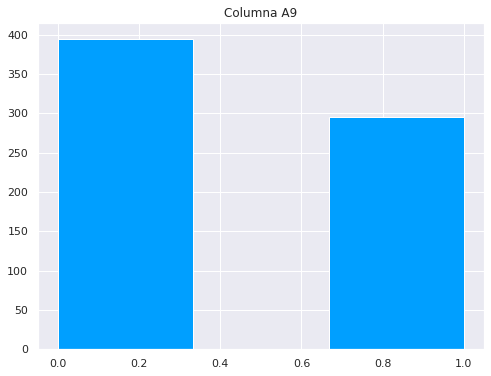

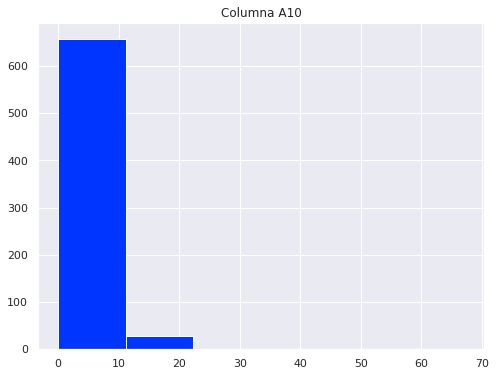

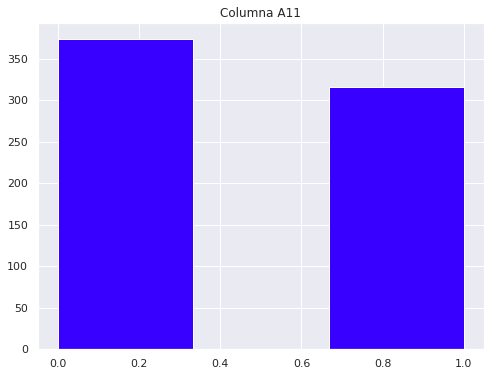

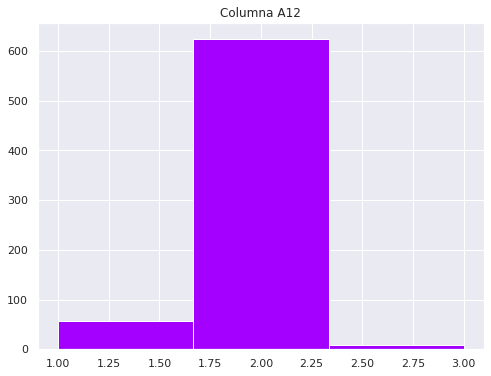

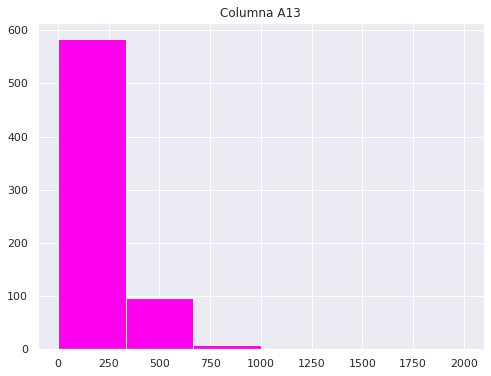

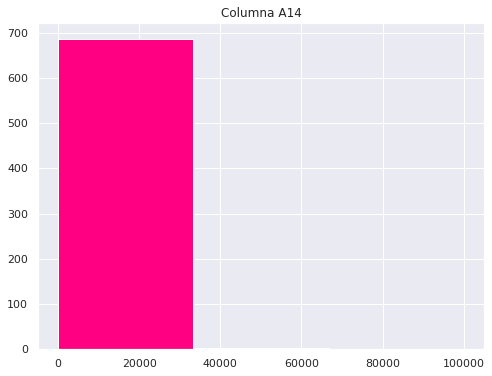

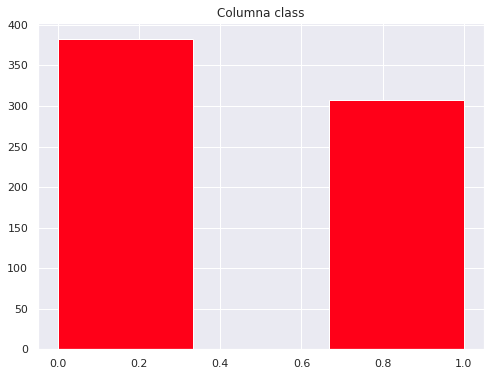

In [ ]:
import seaborn as sns
def plotHist(strColumn="A1",iBins=10,colorIndex=0,dataframe=data_original):
  sns.set(rc={'figure.figsize':(8,6)})
  plt.hist(np.array(dataframe[strColumn]), bins=iBins, color=cmap(colorIndex))
  plt.title('Columna '+strColumn)
  plt.show()

def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

iBins = [3,10,10,3,10,10,6,3,3,6,3,3,6,3,3]
i = 0
cmap = get_cmap(len(iBins))
for s in data_original.columns:
  plotHist(s,iBins[i],i)
  i += 1

**Matriz de correlación**

In [ ]:
corr_df_original = data_original.corr()
corr_df_original

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
A1,1.000000,0.036659,-0.028166,-0.063528,-0.005321,0.052658,0.097009,0.000918,-0.063256,-0.008427,0.053984,-0.059901,0.058595,0.003616,-0.013897
A2,0.036659,1.000000,0.201315,0.089503,-0.093877,0.028510,0.392788,0.204342,0.083680,0.185574,0.054779,0.020703,-0.077159,0.018539,0.161626
A3,-0.028166,0.201315,1.000000,0.091526,0.027665,0.094504,0.298902,0.244317,0.174846,0.271207,-0.013023,0.093752,-0.222346,0.123121,0.206294
A4,-0.063528,0.089503,0.091526,1.000000,0.088846,0.046639,0.080624,0.129863,0.162464,0.106457,0.004964,0.006400,-0.001758,0.120065,0.194306
A5,-0.005321,-0.093877,0.027665,0.088846,1.000000,0.402284,0.144757,0.311833,0.222957,0.150166,0.024738,0.070222,0.088140,0.030735,0.373712
A6,0.052658,0.028510,0.094504,0.046639,0.402284,1.000000,0.240400,0.246193,0.080397,0.098841,0.093641,0.036435,0.070662,0.064841,0.246567
A7,0.097009,0.392788,0.298902,0.080624,0.144757,0.240400,1.000000,0.345689,0.222982,0.322330,0.138139,-0.016297,-0.076389,0.051345,0.322475
A8,0.000918,0.204342,0.244317,0.129863,0.311833,0.246193,0.345689,1.000000,0.432032,0.379532,0.091276,0.045054,-0.067387,0.090012,0.720407
A9,-0.063256,0.083680,0.174846,0.162464,0.222957,0.080397,0.222982,0.432032,1.000000,0.571498,0.017043,0.176097,-0.053321,0.077652,0.458301
A10,-0.008427,0.185574,0.271207,0.106457,0.150166,0.098841,0.322330,0.379532,0.571498,1.000000,0.006944,0.101479,-0.119808,0.063692,0.406410


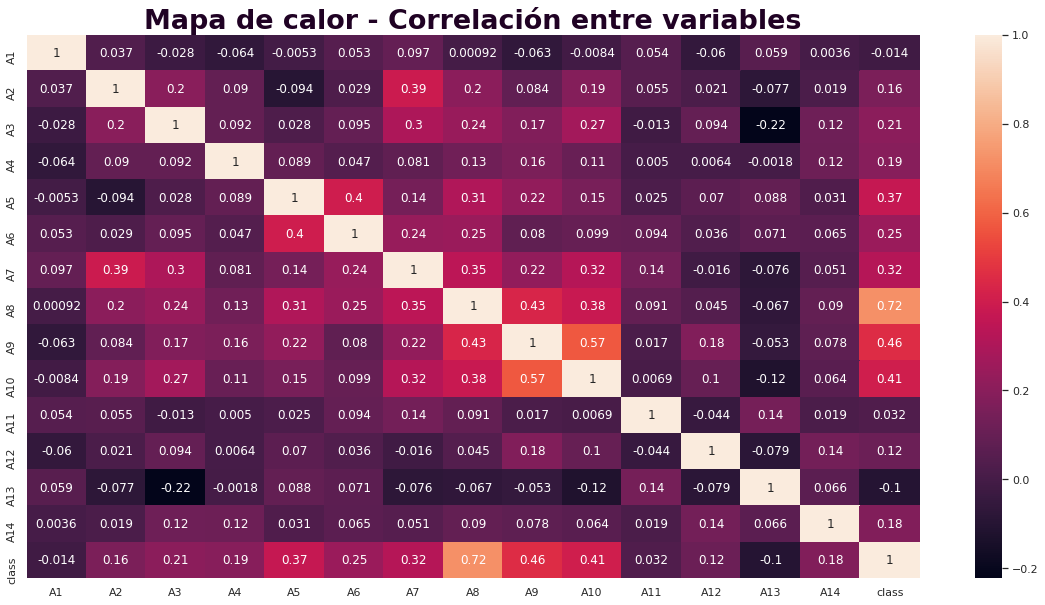

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Mapa de calor - Correlación entre variables", fontdict={'fontsize': 27,'fontweight' : 'bold', 'color' : '#200224'})
#fontdict={'fontsize': 30,'fontweight' : bold,'color' : 'red','verticalalignment': 'baseline','horizontalalignment': loc}
sns.heatmap(corr_df_original, 
        xticklabels=corr_df_original.columns,
        yticklabels=corr_df_original.columns,
        annot = True)

plt.show()

### Conclusiones


- Hay 8 variables categoricas 6 continuas y una de clasificación
- En el documento se explica que hay valores perdidos y fueron remplazados por la moda en el caso de las categoricas y por la media en el caso de las continuas
- Las gráficas muestran la distribución de los valores


## b) Realiza una partición de los datos en 80% de entrenamiento y 20% de prueba.

In [ ]:
X = data_original[['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14']]
y = data_original[['class']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [ ]:
print("Forma del dataset original: ", data_original.shape)
print("Forma de las particiones: ", X_train.shape,y_train.shape,X_test.shape,y_test.shape)

Forma del dataset original:  (690, 15)
Forma de las particiones:  (552, 14) (552, 1) (138, 14) (138, 1)


**552/690 ~ 80% de los datos**

## c) Separa los datos de entrenamiento y de prueba en dos conjuntos: los que tienen datos categóricos serán un conjunto y los que tienen datos continuos un segundo conjunto. Apóyate en la información de las variables dada en la página de la UCI.

In [ ]:
cols_categoricas = ['A1','A4','A5','A6','A8','A9','A11','A12']
cols_continuas = ['A2','A3','A7','A10','A13','A14']

x_train_cat = X_train[cols_categoricas]
x_train_cont = X_train[cols_continuas]
x_test_cat = X_test[cols_categoricas]
x_test_cont = X_test[cols_continuas]

print(x_train_cat.shape,x_train_cont.shape,x_test_cat.shape,x_test_cont.shape)

(552, 8) (552, 6) (138, 8) (138, 6)


## En los siguientes incisos usarás la librería scikit-learn y deberás identificar el modelo adecuado a utilizar en cada caso: https://scikit-learn.org/stable/modules/naive_bayes.html

## d) Aplica el modelo de Bayes Ingenuo al conjunto de datos de entrenamiento categóricos. Obtener la matriz de confusión con las datos de prueba categóricos, así como el porcentaje de exactitud (accuracy).

In [ ]:
def printMetrics(y_test, y_pred):
  #formatted_float = "{:.2f}".format(acc)
  acc = metrics.accuracy_score(y_test, y_pred)
  print("Accuracy: {:.3f}%".format(acc * 100))
  f1_score = metrics.f1_score(y_test, y_pred) 
  print("f1 Score: {:.3f}%".format(f1_score * 100))
  hamming_loss = metrics.hamming_loss(y_test, y_pred)
  print("Hamming loss: {:.3f}%".format(hamming_loss * 100))
  mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
  print("mean_squared_error: {:.3f}%".format(mean_squared_error * 100))
  conf_mtx = metrics.confusion_matrix(y_test, y_pred)
  print("Confusion Matrix: \n", conf_mtx)

Accuracy: 88.406%
f1 Score: 84.314%
Hamming loss: 11.594%
mean_squared_error: 11.594%
Confusion Matrix: 
 [[79  8]
 [ 8 43]]


### Evaluación de los modelos librería scikit-learn

In [ ]:
y_train_vector = y_train.values.T[0]
#print(y_train_vector.shape)

y_test_vector = y_test.values.T[0]
#print(y_test_vector.shape)

In [ ]:
# Tipos de Gaussians GaussianNB MultinomialNB ComplementNB BernoulliNB CategoricalNB
#Iniciando con Gaussian

print("Categorical Analysis:\n")

gnb = GaussianNB()
mnb = MultinomialNB()
cnb = ComplementNB()
bnb = BernoulliNB()
knb = CategoricalNB()

#Gaussian
print("--- Gaussian ---")
model_gnb_cat = gnb.fit(x_train_cat, y_train_vector)
y_pred_gnb_cat = model_gnb_cat.predict(x_test_cat)
print(confusion_matrix(y_test, y_pred_gnb_cat),"\n",
      "{:.3f}%".format(metrics.accuracy_score(y_test, y_pred_gnb_cat) * 100),"\n")

#Multinomial
print("--- Multinomial ---")
model_mnb_cat = mnb.fit(x_train_cat, y_train_vector)
y_pred_mnb_cat = model_mnb_cat.predict(x_test_cat)

print(confusion_matrix(y_test.values, y_pred_mnb_cat),"\n",
      "{:.3f}%".format(metrics.accuracy_score(y_test, y_pred_mnb_cat) * 100),"\n")

#Complement
print("--- Complement ---")
model_cnb_cat = cnb.fit(x_train_cat, y_train_vector)
y_pred_cnb_cat = model_cnb_cat.predict(x_test_cat)
print(confusion_matrix(y_test.values, y_pred_cnb_cat),"\n",
      "{:.3f}%".format(metrics.accuracy_score(y_test, y_pred_cnb_cat) * 100),"\n")


#Bernooulli
print("--- Bernooulli ---")
model_bnb_cat = bnb.fit(x_train_cat, y_train_vector)
y_pred_bnb_cat = model_bnb_cat.predict(x_test_cat)
confusion_matrix(y_test.values, y_pred_bnb_cat)
print(confusion_matrix(y_test.values, y_pred_bnb_cat),"\n",
      "{:.3f}%".format(metrics.accuracy_score(y_test, y_pred_bnb_cat) * 100),"\n")


#Categorical
print("--- Categorical ---")
model_knb_cat = knb.fit(x_train_cat, y_train_vector)
y_pred_knb_cat = model_knb_cat.predict(x_test_cat)
print(confusion_matrix(y_test.values, y_pred_knb_cat),"\n",
      "{:.3f}%".format(metrics.accuracy_score(y_test, y_pred_knb_cat) * 100),"\n")

Categorical Analysis:

--- Gaussian ---
[[79  8]
 [ 8 43]] 
 88.406% 

--- Multinomial ---
[[76 11]
 [12 39]] 
 83.333% 

--- Complement ---
[[75 12]
 [10 41]] 
 84.058% 

--- Bernooulli ---
[[71 16]
 [ 6 45]] 
 84.058% 

--- Categorical ---
[[81  6]
 [11 40]] 
 87.681% 



Mejor Modelo: Gaussian

### Matriz de confusión

In [ ]:
#Gaussian
print("--- Gaussian ---")
y_pred_gnb_cat = model_gnb_cat.predict(x_test_cat)
print('Matriz de Confusión:\n', confusion_matrix(y_test, y_pred_gnb_cat))

--- Gaussian ---
Matriz de Confusión:
 [[79  8]
 [ 8 43]]


### Porcentaje de exactitud (Accuracy)

In [ ]:
  acc = metrics.accuracy_score(y_test, y_pred_gnb_cat)
  print("Accuracy: {:.3f}%".format(acc * 100))

Accuracy: 88.406%


## e) Aplica el modelo de Bayes Ingenuo al conjunto de datos de entrenamiento continuos. Obtener la matriz de confusión con las datos de prueba continuos, así como el porcentaje de exactitud (accuracy).

### Evaluación modelos continuos

In [ ]:
# Tipos de Gaussians GaussianNB MultinomialNB ComplementNB BernoulliNB CategoricalNB

print("Continous Analysis:\n")

gnb = GaussianNB()
mnb = MultinomialNB()
cnb = ComplementNB()
bnb = BernoulliNB()
knb = CategoricalNB()

#Gaussian
print("--- Gaussian ---")
model_gnb_cont = gnb.fit(x_train_cont, y_train_vector)
y_pred_gnb_cont = model_gnb_cont.predict(x_test_cont)
print(confusion_matrix(y_test, y_pred_gnb_cont),"\n",
      "{:.3f}%".format(metrics.accuracy_score(y_test, y_pred_gnb_cont) * 100),"\n")


#Multinomial
print("--- Multinomial ---")
model_mnb_cont = mnb.fit(x_train_cont, y_train_vector)
y_pred_mnb_cont = model_mnb_cont.predict(x_test_cont)

print(confusion_matrix(y_test.values, y_pred_mnb_cont),"\n",
      "{:.3f}%".format(metrics.accuracy_score(y_test, y_pred_mnb_cont) * 100),"\n")

#Complement
print("--- Complement ---")
model_cnb_cont = cnb.fit(x_train_cont, y_train_vector)
y_pred_cnb_cont = model_cnb_cont.predict(x_test_cont)
print(confusion_matrix(y_test.values, y_pred_cnb_cont),"\n",
      "{:.3f}%".format(metrics.accuracy_score(y_test, y_pred_cnb_cont) * 100),"\n")

#Bernooulli
print("--- Bernooulli ---")
model_bnb_cont = bnb.fit(x_train_cont, y_train_vector)
y_pred_bnb_cont = model_bnb_cont.predict(x_test_cont)
confusion_matrix(y_test.values, y_pred_bnb_cont)
print(confusion_matrix(y_test.values, y_pred_bnb_cont),"\n",
      "{:.3f}%".format(metrics.accuracy_score(y_test, y_pred_bnb_cont) * 100),"\n")

#Categorical
print("--- Categorical ---")
model_knb_cont = knb.fit(x_train_cont, y_train_vector)
#y_pred_knb_cont = model_knb_cont.predict(x_test_cont)
#print(confusion_matrix(y_test.values, y_pred_knb_cont),"\n","{:.3f}%".format(metrics.accuracy_score(y_test, y_pred_knb_cont) * 100),"\n")

Continous Analysis:

--- Gaussian ---
[[81  6]
 [32 19]] 
 72.464% 

--- Multinomial ---
[[79  8]
 [29 22]] 
 73.188% 

--- Complement ---
[[79  8]
 [29 22]] 
 73.188% 

--- Bernooulli ---
[[74 13]
 [20 31]] 
 76.087% 

--- Categorical ---


Nota: *Este último knb categórico marca un error con el dataset continuo y se observa una disminución notable con respecto a los dataset categoricos*


**Mejor modelo: Bernooulli**

### Matriz de confusión


In [ ]:
# Bernooulli
print("--- Bernooulli ---")
y_pred_bnb_cont = model_bnb_cont.predict(x_test_cont)
print('Matriz de Confusión:\n', confusion_matrix(y_test, y_pred_bnb_cont))

--- Bernooulli ---
Matriz de Confusión:
 [[74 13]
 [20 31]]


### Porcentaje de exactitud (Accuracy)

In [ ]:
print("Accuracy","{:.3f}%".format(metrics.accuracy_score(y_test, y_pred_bnb_cont) * 100),"\n")

Accuracy 76.087% 



## f) Obtener ahora las predicciones probabilísticas de los datos de prueba de ambos modelos, categórico y continuo. Realiza el producto de dichas probabilidades. Obtener la matriz de confusión del modelo final, así como su exactitud (accuracy).

### **Predicciones probabilísticas de los datos de prueba**

**Predicción probabilistica de atos Continuos**

In [ ]:
#Predición probalistica Continua
proba_cont = model_bnb_cont.predict_proba(x_test_cont)
#Primeros 10 valores.
proba_cont[:10]

array([[0.30014483, 0.69985517],
       [0.75309701, 0.24690299],
       [0.75309701, 0.24690299],
       [0.17281407, 0.82718593],
       [0.75309701, 0.24690299],
       [0.75309701, 0.24690299],
       [0.75309701, 0.24690299],
       [0.5977247 , 0.4022753 ],
       [0.75309701, 0.24690299],
       [0.75309701, 0.24690299]])

**Predicción probabilistica de los dados categóricos**

In [ ]:
# Probabilidad Categórica
proba_cat = model_gnb_cat.predict_proba(x_test_cat)
#Primeros 10 registros de probabilidades
proba_cat[:10]

array([[1.92966160e-03, 9.98070338e-01],
       [9.97161708e-01, 2.83829153e-03],
       [1.80602994e-01, 8.19397006e-01],
       [1.61161466e-02, 9.83883853e-01],
       [9.99113422e-01, 8.86577599e-04],
       [5.38349577e-01, 4.61650423e-01],
       [1.19367833e-01, 8.80632167e-01],
       [9.99989465e-01, 1.05350325e-05],
       [9.98392261e-01, 1.60773895e-03],
       [9.99976610e-01, 2.33904546e-05]])

### **Producto de las probabilidades Categoricas y continuas**

In [ ]:
# Producto de ambas probabilidades categóricas y continuas
producto_probs = proba_cat * proba_cont
df_probabilidades = pd.DataFrame(producto_probs)
df_probabilidades.columns = ['Prob Class 0','Prob Class 1']
df_probabilidades

,Prob Class 0,Prob Class 1
0,0.000579,0.698505
1,0.750959,0.000701
2,0.136012,0.202312
3,0.002785,0.813855
4,0.752429,0.000219
...,...,...
133,0.752989,0.000035
134,0.289188,0.025548
135,0.752732,0.000120
136,0.030291,0.629224


**Predicciones de modelo final**

In [ ]:
def select_pred_class(producto_probabilidades):
  y_pred = []
  for i in range(len(producto_probabilidades)):
    temp_row = producto_probabilidades[i]
    if (temp_row[0] > temp_row[1]):
      y_pred.append(0)
    else:
      y_pred.append(1)
  return y_pred

In [ ]:
# Predicciones modelo final
y_pred = select_pred_class(producto_probs)
y_pred = np.array(y_pred)
y_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1])

### **Matriz de confusión del modelo final y Accuracy**

In [ ]:
print('Matriz de Confusión:\n',confusion_matrix(y_test, y_pred),"\n\nAccuracy",
      "{:.3f}%".format(metrics.accuracy_score(y_test, y_pred) * 100),"\n")

Matriz de Confusión:
 [[82  5]
 [ 9 42]] 

Accuracy 89.855% 



## g) Obtener la precisión y sensibilidad del modelo final. Interpreta dichos resultados de acuerdo al problema.

In [ ]:
print("Precision Score: {:.3f}%".format(metrics.precision_score(y_test, y_pred) * 100))
print("Sensibilidad:  {:.3f}%".format( metrics.recall_score(y_test, y_pred)* 100))
print("F1-Score:  {:.3f}%".format( f1_score(y_test, y_pred)* 100))

Precision Score: 89.362%
Sensibilidad:  82.353%
F1-Score:  85.714%


**Interpretación de los resultados**

La variable de precision nos indica de la calidad de la predicción, es decir ¿qué porcentaje de lo que hemos predicho que pertenecen a la clase que en realidad lo es?
Según esta mética en nuestro modelo hemos acertado al 89.36% de los resultados.

La sensibilidad nos sirve para saber la cantidad es decir, ¿qué porcentaje de cada clase hemos sido capaces de identificar?
Tomando en cuenta la matriz de confusión del punto anterior podemos obserbar que para la clase 1 hemos cometido más errores que para la clase 0 es por esto que nuestro valor de sensibilidad es menor a la presisión.

En el punto anterior tambien podemos ver que nuestro Accuracy es de 89.85%, esta métrica no funciona bien cuando las clases están desbalanceadas como en este caso, la mayoría de los registros pertenecen a la clase positiva(0), así que es más fácil acertar diciendo que un registro pertenecea a esta clase. 

Para problemas con clases desbalanceadas es mucho mejor usar precision, sensibilidad y F1. Estas métricas dan una mejor idea de la calidad del modelo, es por eso que decidimos agregar F1-Score al ejercicio, esta métrica combina Precision y Sensibilidad en una sola medida.

Usando F1 Score podemos ver que nuestro modelo tienen una calificación de 85.71%, nuestro modelo en realidad es bueno, sinemabrgo puede mejorar.


## h) Los siguientes incisos son para entender la manera en que se lleva a cabo el método del Bayes Ingenuo Gaussiano.
- No usaremos aquí los resultados obtenidos anteriormente, sino que usarás las fórmulas que vimos en clase en el tema de Bayes ingenuo para el ejemplo de Spam vs Ham; pero usando ahora la función de densidad gaussiana para calcular las probabilidades condicionales. 
- Para ello usaremos los primeros siete datos de la base de datos de las solicitudes de crédito, pero tomando solo las variables continuas. Es decir, considera los datos de la tabla de abajo.

In [ ]:
# Primeros 6 Datos continuos de la Base de Datos: A2, A3, A7, A10, A13, A14, class
data_continua = data_original[cols_continuas].replace(0,1)
data_continua['class'] = data_original['class']
data_continua = data_continua.iloc[0:6]
data_continua

,A2,A3,A7,A10,A13,A14,class
0,22.08,11.460,1.585,1,100,1213,0
1,22.67,7.000,0.165,1,160,1,0
2,29.58,1.750,1.250,1,280,1,0
3,21.67,11.500,1.000,11,1,1,1
4,20.17,8.170,1.960,14,60,159,1
5,15.83,0.585,1.500,2,100,1,1


### Formulas de Bayes Ingenuo vistas en clase:

In [ ]:
data_continua.describe()

,A2,A3,A7,A10,A13,A14,class
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,22.000000,6.744167,1.243333,5.000000,116.833333,229.333333,0.500000
std,4.459561,4.686844,0.619400,5.899152,95.604219,486.022908,0.547723
min,15.830000,0.585000,0.165000,1.000000,1.000000,1.000000,0.000000
25%,20.545000,3.062500,1.062500,1.000000,70.000000,1.000000,0.000000
50%,21.875000,7.585000,1.375000,1.500000,100.000000,1.000000,0.500000
75%,22.522500,10.637500,1.563750,8.750000,145.000000,119.500000,1.000000
max,29.580000,11.500000,1.960000,14.000000,280.000000,1213.000000,1.000000


#### Calculo de Medias y Varianzas

In [ ]:
##Group by class
class0 = data_continua[data_continua['class']==0]
print(class0)
class1 = data_continua[data_continua['class']==1]
print(class1)

      A2     A3     A7  A10  A13   A14  class
0  22.08  11.46  1.585    1  100  1213      0
1  22.67   7.00  0.165    1  160     1      0
2  29.58   1.75  1.250    1  280     1      0
      A2      A3    A7  A10  A13  A14  class
3  21.67  11.500  1.00   11    1    1      1
4  20.17   8.170  1.96   14   60  159      1
5  15.83   0.585  1.50    2  100    1      1


In [ ]:
#Funcion para obtener las medias por clase
def get_means(x):
  means = []
  for i in range(len((np.array(x.columns)[:6]))):
    means.append(np.mean(x[x.columns[i]]))
  return means

In [ ]:
#Obtenemos las medias de cada claase
means_class0 = get_means(class0)
print("Medias de la Clase 0: ",means_class0)
means_class1 = get_means(class1)
print("Medias de la Clase 1: ",means_class1)

Medias de la Clase 0:  [24.776666666666667, 6.736666666666667, 1.0, 1.0, 180.0, 405.0]
Medias de la Clase 1:  [19.223333333333333, 6.751666666666668, 1.4866666666666666, 9.0, 53.666666666666664, 53.666666666666664]


In [ ]:
#Funcion para obtener las varianzas por clase
def get_var(x):
  varianzas = []
  for i in range(len((np.array(x.columns)[:6]))):
    var = np.var(x[x.columns[i]])
    if var == 0:
      var = 0.0001
    varianzas.append(var)
  return varianzas

In [ ]:
#Obtenemos las varianzas de cada claase
var_class0 = get_var(class0)
print("Varianzas de la Clase 0: ",var_class0)
var_class1 = get_var(class1)
print("Varianzas de la Clase 1: ",var_class1)

Varianzas de la Clase 0:  [11.594022222222216, 15.748688888888893, 0.3673166666666667, 0.0001, 5600.0, 326432.0]
Varianzas de la Clase 1:  [6.132355555555559, 20.86203888888889, 0.15368888888888887, 26.0, 1653.5555555555554, 5547.555555555556]


##### **Justificación de Varianzas:**

Cuando la varianza de alguna de las columnas es igual a cero no podemos usar este valor en la formula de densidad gausiana ya que terminaremos con un divición donde el denominador o divisor es cero.

Al encontrarnos con este caso decidimos aproximar la varianza usando un número muy pequeño cercano a cero en este caso hemos decido reemplazar el valor de la varianza en nuestra formula, ahora la *varianza = 0.0001* con esta aproximación podemos correr nuestra formula de densidad gausiana.

#### Función de densidad gausiana para calcular probabilidades condicionales

In [ ]:
# Calcular probabilidad condicional usando Función de densidad Gausiana
def densidad_gausiana(a, varianza, media):
  cosiente = (-1*(((a - media)**2)/(2*varianza)))
  densidad = (1/(np.sqrt(2*np.pi*varianza)))*np.exp(cosiente)
  print("Densidad Gausiana:",densidad)
  return densidad
    

#### Funcion para obtener la probabilidad Condicional

In [ ]:
def get_probabilidad(datos_entrada):
  print("Dato de entrada:",datos_entrada)
  densidad_clase0 = (0.5)*densidad_gausiana(datos_entrada[0],var_class0[0],means_class0[0])* \
                    densidad_gausiana(datos_entrada[1],var_class0[1],means_class0[1])* \
                    densidad_gausiana(datos_entrada[2],var_class0[2],means_class0[2])* \
                    densidad_gausiana(datos_entrada[3],var_class0[3],means_class0[3])* \
                    densidad_gausiana(datos_entrada[4],var_class0[4],means_class0[4])* \
                    densidad_gausiana(datos_entrada[5],var_class0[5],means_class0[5])
  print("\nProb clase 0: ", densidad_clase0, '\n')
  densidad_clase1 = (0.5)*densidad_gausiana(datos_entrada[0],var_class1[0],means_class1[0])* \
                    densidad_gausiana(datos_entrada[1],var_class1[1],means_class1[1])* \
                    densidad_gausiana(datos_entrada[2],var_class1[2],means_class1[2])* \
                    densidad_gausiana(datos_entrada[3],var_class1[3],means_class1[3])* \
                    densidad_gausiana(datos_entrada[4],var_class1[4],means_class1[4])* \
                    densidad_gausiana(datos_entrada[5],var_class1[5],means_class1[5])
  print("\nProb clase 1: ", densidad_clase1, '\n')
  prob = (densidad_clase0/densidad_clase1)
  return prob


## i) Usa los primeros seis datos (renglones) para obtener  Las funciones de densidad condicional de cada uno de estos factores con respecto a cada una de las clases, y usar dichos resultados para predecir la clase del último dato (renglón 7). 
 * NOTA: El resultado debe ser de la clase 0 como se muestra en la tabla. Ver la sección 2.4 del artículo de autores griegos al inicio del problema.

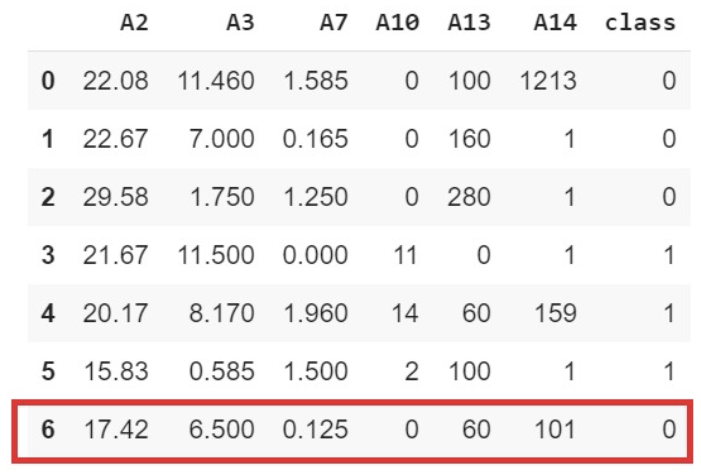

### Densidad Gausiana para los primero 6 datos cada factor

In [ ]:
# Cargamos los 6 primeros renglones 
data_cont_6 = data_continua[cols_continuas]
data_cont_6

,A2,A3,A7,A10,A13,A14
0,22.08,11.460,1.585,1,100,1213
1,22.67,7.000,0.165,1,160,1
2,29.58,1.750,1.250,1,280,1
3,21.67,11.500,1.000,11,1,1
4,20.17,8.170,1.960,14,60,159
5,15.83,0.585,1.500,2,100,1


In [ ]:
def data_train(data):
  probabilidades = []
  clase = []
  filled_data = data.copy()
  for i in range(len(data)):
     print("============ \n*  Row ",i+1," * \n============")
     prob = get_probabilidad(np.array(data.iloc[i]))
     print("> Probabilidad Row ",i+1, ":" ,prob)
     if prob < 1:
       print("=== Row",i+1, "Pertenece a la clase 1 ===\n")
       clase.append(1)
     else:
       print("=== Row",i+1, "Pertenece a la clase 0 ===\n")
       clase.append(0)
     probabilidades.append(prob)
  filled_data['class'] = clase
  return probabilidades,clase,filled_data

In [ ]:
# Obtenemos probabilidades de cada clase
probabilidades,clase,filled_data = data_train(data_cont_6)

*  Row  1  * 
Dato de entrada: [2.208e+01 1.146e+01 1.585e+00 1.000e+00 1.000e+02 1.213e+03]
Densidad Gausiana: 0.08562365254072996
Densidad Gausiana: 0.049507745692650255
Densidad Gausiana: 0.413119782938134
Densidad Gausiana: 39.89422804014327
Densidad Gausiana: 0.0030105633959718993
Densidad Gausiana: 0.0002568734513741304

Prob clase 0:  2.701406633463399e-08 

Densidad Gausiana: 0.08281915918981742
Densidad Gausiana: 0.05134366499916375
Densidad Gausiana: 0.9861133972995
Densidad Gausiana: 0.022851099766283748
Densidad Gausiana: 0.005126049476257958
Densidad Gausiana: 1.314432065278925e-55

Prob clase 1:  3.2280673843016705e-62 

> Probabilidad Row  1 : 8.3684951764035e+53
=== Row 1 Pertenece a la clase 0 ===

*  Row  2  * 
Dato de entrada: [ 22.67    7.      0.165   1.    160.      1.   ]
Densidad Gausiana: 0.09675463877465719
Densidad Gausiana: 0.10030711134901656
Densidad Gausiana: 0.25480621516039403
Densidad Gausiana: 39.89422804014327
Densidad Gausiana: 0.005144054191122984


In [ ]:
# Clases tras usar funciones de densidad condicional
clase

[0, 0, 0, 1, 1, 1]

In [ ]:
filled_data

,A2,A3,A7,A10,A13,A14,class
0,22.08,11.460,1.585,1,100,1213,0
1,22.67,7.000,0.165,1,160,1,0
2,29.58,1.750,1.250,1,280,1,0
3,21.67,11.500,1.000,11,1,1,1
4,20.17,8.170,1.960,14,60,159,1
5,15.83,0.585,1.500,2,100,1,1


### Predicción de clase para renglón 7

In [ ]:
#Reglon 7 (Indice 6 porque inicia en 0)
data_original[cols_continuas].iloc[6:7]

,A2,A3,A7,A10,A13,A14
6,17.42,6.5,0.125,0,60,101


In [ ]:
input = np.array(data_original[cols_continuas].iloc[7].replace(0,1))
print(input)

[ 58.67   4.46   3.04   6.    43.   561.  ]


In [ ]:
prob = get_probabilidad(input)
print("> Probabilidad Row 7: " ,prob)
if prob < 1:
  print("\n**************************\n* Pertenece a la clase 1 *\n**************************\n")
  clase.append(1)
else:
  print("\n**************************\n* Pertenece a la clase 0 *\n**************************\n")
  clase.append(0)

Dato de entrada: [ 58.67   4.46   3.04   6.    43.   561.  ]
Densidad Gausiana: 3.576236912617108e-23
Densidad Gausiana: 0.08527472505984979
Densidad Gausiana: 0.002281231421459429
Densidad Gausiana: 1e-05
Densidad Gausiana: 0.000997754760317081
Densidad Gausiana: 0.0006727056064452325

Prob clase 0:  2.3347200569675918e-38 

Densidad Gausiana: 1.2811578590484112e-56
Densidad Gausiana: 0.07701366823006664
Densidad Gausiana: 0.00039671408540635863
Densidad Gausiana: 0.06580471903980299
Densidad Gausiana: 0.009478927742200742
Densidad Gausiana: 4.508055319899658e-13

Prob clase 1:  5.5033048171017324e-77 

> Probabilidad Row 7:  4.242396404633738e+38

**************************
* Pertenece a la clase 0 *
**************************

